/tmp/ipython-input-2814159409.py:129: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)
/tmp/ipython-input-2814159409.py:129: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)
/tmp/ipython-input-2814159409.py:129: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)
/tmp/ipython-input-2814159409.py:129: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)
/tmp/ipython-input-2814159409.py:129: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)
/tmp/ipython-input-2

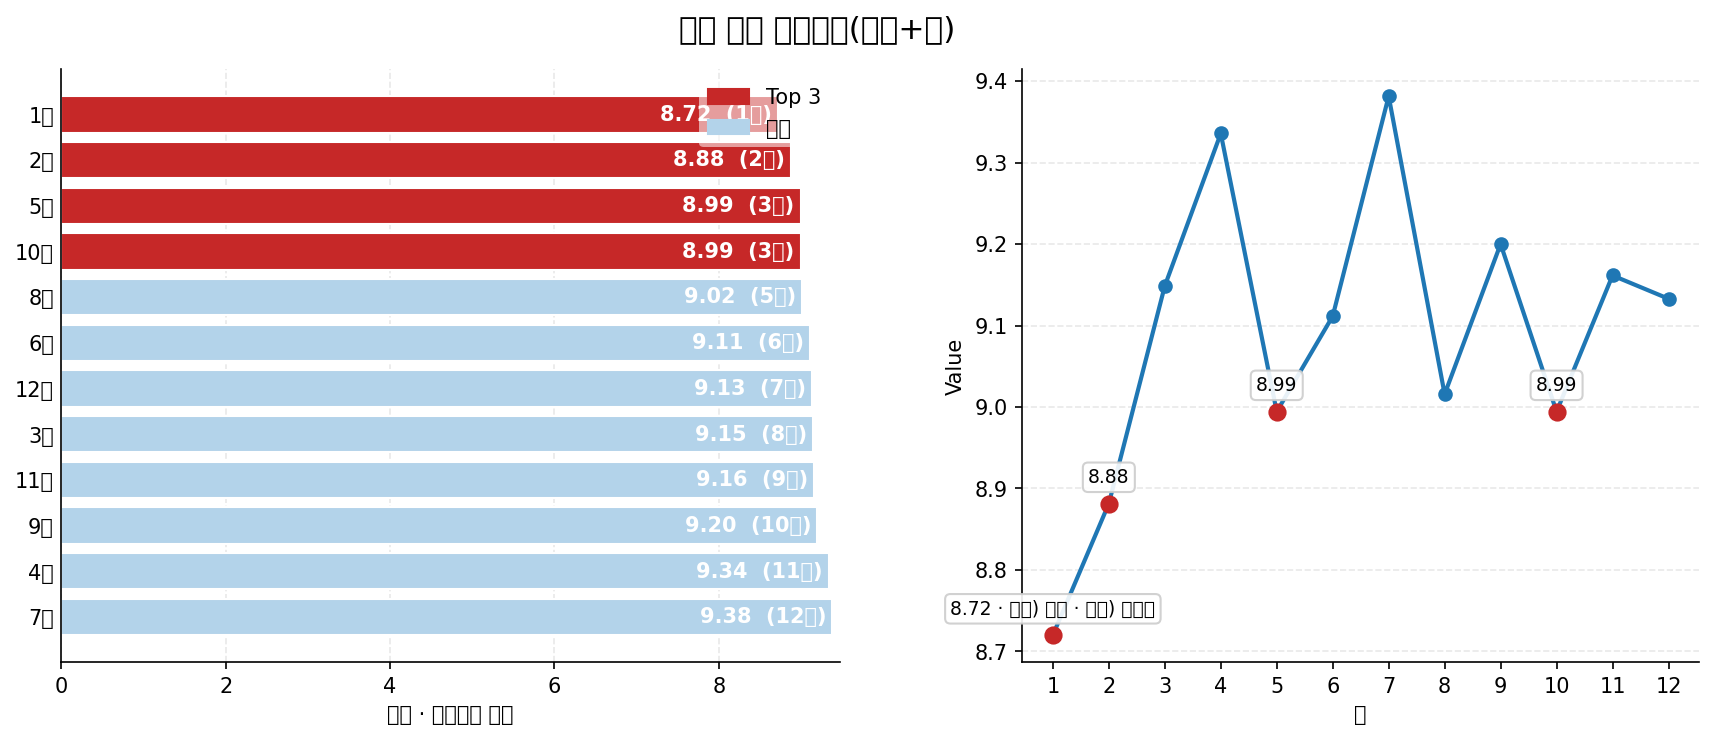

/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-2814159409.py:158: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.tig

복합 그래프 저장: /mnt/data/preferred_months_combo.png


/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
/tmp/ipython-input-2814159409.py:159: UserWarning: Glyph 49884 (\N{HANGUL SYL

월별 카드 저장: /mnt/data/month_cards
PPT 저장: /content/monthly_events_report.pptx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# ============================================================
# 월별 그래프 + 월별 사건 레포트 PPT 자동 생성 (콤팩트/한글 지원)
# ============================================================
import sys, subprocess, os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (필요시) python-pptx 설치
try:
    from pptx import Presentation
    from pptx.util import Inches, Pt
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "python-pptx"])
    from pptx import Presentation
    from pptx.util import Inches, Pt

# (선택) 코랩 한글 폰트 설정
# !apt -y install fonts-nanum > /dev/null
# import matplotlib
# matplotlib.rc("font", family="NanumGothic")
# matplotlib.rcParams["axes.unicode_minus"] = False

# -------------------- 공통 유틸 --------------------
EVENTS_CSV = Path("/content/month_events.csv")
OUTDIR.mkdir(parents=True, exist_ok=True)
CARD_DIR = OUTDIR / "month_cards"; CARD_DIR.mkdir(exist_ok=True)

def load_events():
    """events DF 있으면 사용, 없으면 CSV, 둘 다 없으면 빈 DF"""
    if "events" in globals() and isinstance(events, pd.DataFrame):
        ev = events.copy()
    elif EVENTS_CSV.exists():
        ev = pd.read_csv(EVENTS_CSV, dtype=str)
    else:
        ev = pd.DataFrame(columns=["period","topic","detail","source"])

    for c in ["period","topic","detail","source"]:
        if c not in ev.columns: ev[c] = ""
    ev = ev.fillna("")
    ev["period"] = ev["period"].astype(str).str.strip()
    ev["topic"]  = ev["topic"].astype(str).str.strip()
    ev["detail"] = ev["detail"].astype(str).str.strip()
    ev["source"] = ev["source"].astype(str).str.strip()

    # 기간 필터 및 month 추출
    ev = ev[(ev["period"] >= str(START)) & (ev["period"] <= str(END))].copy()
    if ev.empty:
        ev["month"] = []
        return ev
    ev["month"] = ev["period"].str.slice(4,6).astype(int)
    return ev

def topics_by_month_map(ev: pd.DataFrame, limit=2, trunc=36) -> dict:
    """월별 주제 문자열(최대 limit개, 각 trunc자로 잘라 … 처리)"""
    if ev is None or ev.empty: return {}
    ev2 = ev.copy()
    ev2["note"] = np.where(ev2["topic"].str.len()>0, ev2["topic"], ev2["detail"])
    ev2 = ev2[ev2["note"].str.len()>0]
    if ev2.empty: return {}
    def _short(s):
        s = (s or "").strip()
        return (s[:trunc] + "…") if len(s) > trunc else s
    return (ev2.groupby("month")["note"]
             .apply(lambda ss: " · ".join(_short(x) for x in list(dict.fromkeys(ss))[:limit]))
             .to_dict())

events_df = load_events()
topics_map = topics_by_month_map(events_df, limit=2, trunc=36)

# -------------------- 1) 복합 그래프(막대+선) --------------------
from matplotlib.patches import Patch

def plot_bar_and_line_combo(grp: pd.DataFrame, out_path: Path):
    g_rank  = grp.copy().sort_values("rank",  ascending=True).reset_index(drop=True)
    g_month = grp.copy().sort_values("month", ascending=True).reset_index(drop=True)

    x_vals = g_rank["mean_value"].astype(float).values
    ranks  = g_rank["rank"].astype(int).values
    x_max  = float(x_vals.max()) if len(x_vals) else 0.0

    top_color, other_color = "#c62828", "#b3d3ea"
    bar_colors = [top_color if r <= 3 else other_color for r in ranks]

    fig, (ax_bar, ax_line) = plt.subplots(
        ncols=2, figsize=(12, 5.2), dpi=150,
        gridspec_kw={"width_ratios":[1.15,1.0]}
    )
    fig.suptitle("월별 평균 프로파일(막대+선)", fontsize=15, y=0.97)

    # [왼쪽] 가로막대(순위 정렬)
    y_labels = [f"{m}월" for m in g_rank["month"].astype(int)]
    y_pos = np.arange(len(g_rank))
    bars = ax_bar.barh(y_pos, x_vals, color=bar_colors, edgecolor="white", linewidth=1.0, zorder=2)
    ax_bar.set_yticks(y_pos); ax_bar.set_yticklabels(y_labels); ax_bar.invert_yaxis()
    direction = "높을수록 선호" if HIGHER_IS_BETTER else "낮을수록 선호"
    ax_bar.set_xlabel(f"{REGION_FILTER or '전체'} · {direction}", labelpad=4)
    for sp in ("top","right"): ax_bar.spines[sp].set_visible(False)
    ax_bar.grid(axis="x", linestyle="--", alpha=0.28, zorder=0)
    ax_bar.tick_params(axis="y", length=0)
    ax_bar.set_xlim(0, x_max*1.01)
    for bar, v, r in zip(bars, x_vals, ranks):
        cy = bar.get_y()+bar.get_height()/2
        ax_bar.text(bar.get_width()-x_max*0.008, cy, f"{v:.2f}  ({r}위)",
                    va="center", ha="right", fontsize=10, color="white", fontweight="bold")
    leg = ax_bar.legend(handles=[Patch(color=top_color, label="Top 3"),
                                 Patch(color=other_color, label="기타")],
                        loc="upper right", frameon=True)
    leg.get_frame().set_alpha(0.55); leg.get_frame().set_linewidth(0.0)

    # [오른쪽] 월 순서 선그래프 + Top3 이유 말풍선
    xm = g_month["month"].astype(int).values
    ym = g_month["mean_value"].astype(float).values
    ax_line.plot(xm, ym, marker="o", linewidth=2, zorder=2)
    ax_line.set_xticks(range(1,13)); ax_line.set_xlabel("월"); ax_line.set_ylabel("Value")
    for sp in ("top","right"): ax_line.spines[sp].set_visible(False)
    ax_line.grid(True, axis="y", linestyle="--", alpha=0.28, zorder=0)
    top_months = set(g_rank.loc[g_rank["rank"]<=3, "month"].astype(int))
    for m, v in zip(xm, ym):
        if m in top_months:
            ax_line.scatter(m, v, s=60, color=top_color, zorder=3)
            reason = topics_map.get(m, "")
            label  = f"{v:.2f}" if not reason else f"{v:.2f} · {reason}"
            ax_line.annotate(label, xy=(m,v), xytext=(0,10), textcoords="offset points",
                             ha="center", fontsize=9,
                             bbox=dict(boxstyle="round,pad=0.28", facecolor="white", edgecolor="#ccc", alpha=0.9))
    plt.subplots_adjust(left=0.08, right=0.99, top=0.90, bottom=0.14, wspace=0.25)
    fig.savefig(out_path, bbox_inches="tight"); plt.show(); plt.close(fig)

combo_img = OUTDIR / "preferred_months_combo.png"
plot_bar_and_line_combo(month_stats, combo_img)
print("복합 그래프 저장:", combo_img)

# -------------------- 2) 월별 카드형 그래프(12장) --------------------
def save_month_cards(grp: pd.DataFrame, ev: pd.DataFrame, out_dir: Path):
    g = grp.copy().sort_values("month")
    val_map  = dict(zip(g["month"].astype(int), g["mean_value"].astype(float)))
    rank_map = dict(zip(g["month"].astype(int), g["rank"].astype(int)))
    topics   = topics_by_month_map(ev, limit=2, trunc=60)

    for m in range(1,13):
        v  = val_map.get(m, np.nan); rk = rank_map.get(m, np.nan)
        t  = topics.get(m, "")
        fig, ax = plt.subplots(figsize=(5.2, 3.0), dpi=150)
        # 미니 트렌드(월순)
        ax.plot(g["month"].astype(int), g["mean_value"].astype(float), marker="o", linewidth=2)
        ax.scatter([m], [v], s=60, color="#c62828", zorder=3)
        ax.set_xticks(range(1,13)); ax.set_xlabel("월"); ax.set_ylabel("Value")
        for sp in ("top","right"): ax.spines[sp].set_visible(False)
        ax.grid(True, axis="y", linestyle="--", alpha=0.28)
        ax.set_title(f"{m}월 — 평균 {v:.2f} · {rk:.0f}위" if pd.notna(v) else f"{m}월")
        if t:
            ax.annotate(t, xy=(m, v), xytext=(0, 16), textcoords="offset points",
                        ha="center", fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.28", facecolor="white", edgecolor="#ccc", alpha=0.9))
        out_path = out_dir / f"card_{m:02d}.png"
        fig.tight_layout()
        fig.savefig(out_path, bbox_inches="tight"); plt.close(fig)
    print("월별 카드 저장:", out_dir)

save_month_cards(month_stats, events_df, CARD_DIR)

# -------------------- 3) PPT: 개요 → 복합그래프 → 월별 카드/사건 --------------------
prs = Presentation()

# (1) 제목
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "청년층 취업 선호 월 — 월별 레포트"
sub = slide.placeholders[1]
sub.text = f"기간: {START} ~ {END} · 지역: {REGION_FILTER} · 지표 방향: {'높을수록 선호' if HIGHER_IS_BETTER else '낮을수록 선호'}"

# (2) 통계 개요 표
s2 = prs.slides.add_slide(prs.slide_layouts[5]); s2.shapes.title.text = "월별 통계 개요"
tbl = month_stats.sort_values("month").copy()
tbl["mean_value"] = tbl["mean_value"].round(3); tbl["std"] = tbl["std"].fillna(0).round(3)
rows, cols = len(tbl)+1, 7
t = s2.shapes.add_table(rows, cols, Inches(0.3), Inches(1.4), Inches(9.3), Inches(5.0)).table
headers = ["월","건수","평균","표준편차","최솟값","최댓값","순위"]
for j,h in enumerate(headers):
    t.cell(0,j).text = h; t.cell(0,j).text_frame.paragraphs[0].font.bold = True
for i,(_,r) in enumerate(tbl.iterrows(), start=1):
    t.cell(i,0).text = str(int(r["month"]))
    t.cell(i,1).text = str(int(r["count"]))
    t.cell(i,2).text = str(r["mean_value"])
    t.cell(i,3).text = str(r["std"])
    t.cell(i,4).text = str(round(r["min"],3))
    t.cell(i,5).text = str(round(r["max"],3))
    t.cell(i,6).text = str(int(r["rank"]))

# (3) 복합 그래프
s3 = prs.slides.add_slide(prs.slide_layouts[5]); s3.shapes.title.text = "월별 평균 프로파일(막대+선)"
if combo_img.exists():
    s3.shapes.add_picture(str(combo_img), Inches(0.3), Inches(1.4), width=Inches(9.3))

# (4) 월별 카드(3x2 타일) — 6개월씩 2장으로 나눠 표시
def add_cards_slide(months):
    s = prs.slides.add_slide(prs.slide_layouts[5])
    s.shapes.title.text = f"월별 카드 요약: {months[0]}–{months[-1]}월"
    x0, y0, w = 0.3, 1.4, 3.0
    dx, dy = 3.1, 2.4
    for idx, m in enumerate(months):
        r, c = divmod(idx, 3)  # 3열 배치
        img = CARD_DIR / f"card_{m:02d}.png"
        if img.exists():
            s.shapes.add_picture(str(img), Inches(x0 + c*dx), Inches(y0 + r*dy), width=Inches(w))

add_cards_slide([1,2,3,4,5,6])
add_cards_slide([7,8,9,10,11,12])

# (5) 월별 상세 사건 — 달마다 1장(없으면 건너뜀)
if not events_df.empty:
    ev = events_df.sort_values(["month", "period", "topic"]).copy()
    for m, chunk in ev.groupby("month"):
        s = prs.slides.add_slide(prs.slide_layouts[5])
        mv  = float(month_stats.loc[month_stats["month"]==m, "mean_value"].iloc[0])
        rk  = int(month_stats.loc[month_stats["month"]==m, "rank"].iloc[0])
        s.shapes.title.text = f"{m}월 상세 레포트 (평균 {mv:.2f}, 순위 {rk}위)"
        # 왼쪽: 불릿
        tb = s.shapes.add_textbox(Inches(0.4), Inches(1.4), Inches(5.4), Inches(4.8))
        tf = tb.text_frame; tf.word_wrap = True
        p0 = tf.paragraphs[0]; p0.text = f"{START}~{END} 기간 {m}월 주요 사건"; p0.font.bold = True
        for row in chunk.itertuples(index=False):
            topic = (row.topic or row.detail or "").strip()
            detail = f" — {row.detail}" if row.detail and row.topic else ""
            src = f" ({row.source})" if row.source else ""
            p = tf.add_paragraph()
            p.text = f"{row.period} · {topic}{detail}{src}"
            p.level = 1
        # 오른쪽: 그 달 카드 이미지
        card = CARD_DIR / f"card_{m:02d}.png"
        if card.exists():
            s.shapes.add_picture(str(card), Inches(6.2), Inches(1.6), width=Inches(3.0))

# (6) 저장 & (코랩이면) 다운로드
ppt_path = "/content/monthly_events_report.pptx"
prs.save(ppt_path)
print("PPT 저장:", ppt_path)

try:
    from google.colab import files
    files.download(ppt_path)
except Exception:
    pass
